# 3D diffusion
New to pynams? Check out the [intro and basic examples](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES.ipynb), [peak fitting with pynams](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_peakfitting.ipynb), and [1D diffusion](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_diffusion1D.ipynb)

## Setup

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]
from __future__ import print_function, division
import pynams
from pynams import Sample, Profile, styles, Block
from pynams.diffusion import models
import matplotlib.pyplot as plt
import numpy as np
import os 

folder = os.path.join(pynams.__path__[0], 'example_FTIR_spectra\\KunlunDiopside\\')

my_sample = Sample(length_a_microns=7000, 
                   length_b_microns=[2185, 2190, 2188, 2185, 2188],
                   length_c_microns=[1546, 1551, 1536, 1548, 1548],
                   IGSN='IEFERKUN4') # http://www.geosamples.org/

# 3-dimensional diffusion models
## non-path integrated (3Dnpi) models
3-dimensional diffusion in a rectangular parallelepiped can be determined analytically simply by multiplying the 1D unit solutions together (Carslaw & Jaeger 1959 Section 6.4; Crank 1975 Section 2.5.1). 

'Non-path integrated' indicates that these are diffusion profiles assumed to go through the center of the sample, e.g., for a sample that has been polished into the center such that each measurement is assumed to have a constant concentration.

Required input:
* A list of the 3 lengths in each direction (if only 1, assumes a cube shape)
* A list of the 3 diffusivities in each direction (if only 1, assumes isotropic)
* Time

Output:
* figure and axes handles if plot3=True (default) and axes=None (default)
* the 3D matrix of concentrations throughout the crystal, v
* 2 lists of the x and y values across each profile, as plotted

Change the length of the x and y lists with keyword points (default=50)


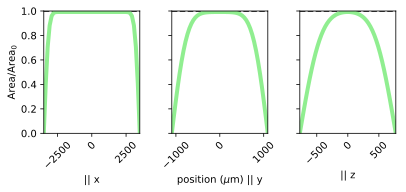

In [4]:
fig, axes, v, x, y = models.diffusion3Dnpi(lengths_microns=my_sample.lengths_microns, 
                                           log10Ds_m2s=-11, time_seconds=3600.)

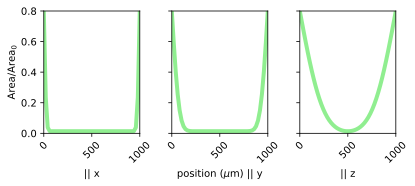

In [5]:
models.diffusion3Dnpi(lengths_microns=1000., log10Ds_m2s=[-13., -12., -11.],
                      time_seconds=30*60, initial=0, final=0.8, ytop=0.8,
                      centered=False, show_line_at_initial=False);

In [6]:
v, x, y = models.diffusion3Dnpi(lengths_microns=my_sample.lengths_microns, final=0.5,
                                log10Ds_m2s=-10.5, time_seconds=3600., axes=axes,
                                styles3=[styles.style_1]*3)

print('shape of 3D matrix of concentration data')
print(np.shape(v))
print('\ndata shown in plots above is returned as x and y')

shape of 3D matrix of concentration data
(50, 50, 50)

data shown in plots above is returned as x and y


## whole-block (3Dwb) models
'Whole-block' here indicates that the measurements include changes along the direction of the infrared ray path, i.e., the thickness direction. The calculations start out like 3Dnpi above and then account for the path integration.

Required input:
* A list of the 3 lengths in each direction (if only 1, assumes a cube shape)
* A list of the 3 diffusivities in each direction (if only 1, assumes isotropic)
* Time
* A list of the raypaths for each traverse

Output:
* figure and axes handles if plot3=True (default) and axes=None (default)
* 2 lists of the x and y values across each profile, as plotted

Other keywords and options are similar to 3Dnpi above.

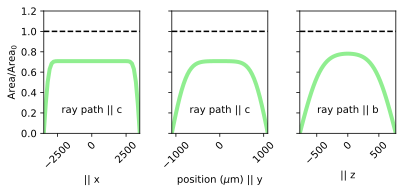

In [7]:
raypaths = ['c', 'c', 'b']
fig, ax, x, y = models.diffusion3Dwb(lengths_microns=my_sample.lengths_microns, 
                                     log10Ds_m2s=-11, time_seconds=3600.,
                                     raypaths=raypaths)
for idx, axis in enumerate(ax):
    axis.text(0, 0.2, ' '.join(('ray path ||', raypaths[idx])), ha='center')

## Blocks of data
A pynams Block is a group of exactly 3 orthogonal profiles. 

The 3 profiles must have directions = a, b, and c and raypaths (thickness directions) consistent with the sample, but
these directions don't necessarily have to correspond to the true crystallographic or optical axes.

### First make the 3 individual profiles

In [14]:
# Example data in pynams folder
profile1 = Profile(name = 'Kunlun diopside initial || a',
                   sample = my_sample, folder=folder,
                   direction = 'a', raypath = 'c',
                   fnames = ['K4q_adc05', 'K4q_bdcMID', 'K4q_adc65'],
                   positions_microns = [525., 3500., 6525.])

profile2 = Profile(name = 'Kunlun diopside initial || b',
                   sample = my_sample, folder=folder,
                   direction = 'b', raypath = 'c', 
                   fnames = ['K4q_bdc01', 'K4q_bdcMID', 'K4q_bdc02'],
                   positions_microns = [120., 1094, 2067])

profile3 = Profile(name = 'Kunlun diopside initial || c',
                   sample = my_sample, folder = folder, 
                   direction = 'c', raypath = 'b',
                   fnames = ['K4q_cdb01', 'K4q_cdbMID', 'K4q_cdb02', 'K4q_cdb03'],
                   positions_microns = [100., 773., 1454., 1326.])

### Specify the initial profiles
If you want to treat these data as whole-block data, you will need to specify the initial profile for each profile either directly (see below) or using the initial_profile keyword when creating the profile. 

In [13]:
profile1.initial_profile = profile1 # this is the default assumed above

### Group the three profiles together into a single Block

In [ ]:
my_first_block = Block(name = 'Kunlun diopside initial',
                       profiles = [profile1, profile2, profile3])

### Plot areas for each profile in Block
Be sure to run the make_areas() method first

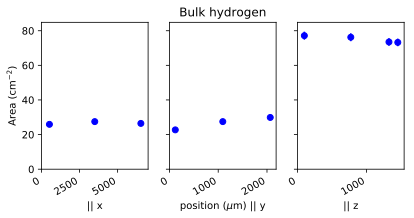

In [10]:
my_first_block.get_baselines(print_confirmation=False)
my_first_block.make_areas()
fig, list_of_3_axes = my_first_block.plot_areas_3panels() 

### Plot whole-block areas for each profile in Block

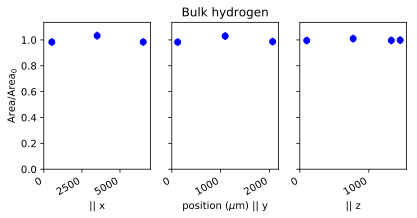

In [15]:
fig, list_of_3_axes = my_first_block.plot_areas_3panels(wholeblock=True) 

### Plot multiple blocks of data on the same set of axes

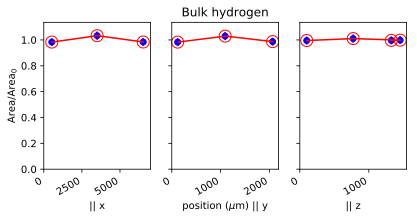

In [40]:
my_second_block = my_first_block
fig, list_of_3_axes = my_first_block.plot_areas_3panels(wholeblock=True) 
style2 = {'marker':'o', 'markerfacecolor':'None', 'color':'r', 'markersize':12}
my_second_block.plot_areas_3panels(wholeblock=True, styles3=[style2]*3, axes3=list_of_3_axes);

### Plot 3Dwb diffusion curves on whole-block data

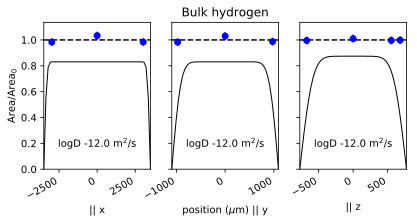

In [19]:
fig, list_of_axes = my_first_block.plot_diffusion(time_seconds=3*3600., labelDy=0.2, 
                                                  wholeblock_data=True,  
                                                  wholeblock_diffusion=True)

### Plot 3Dnpi diffusion curves on whole-block data

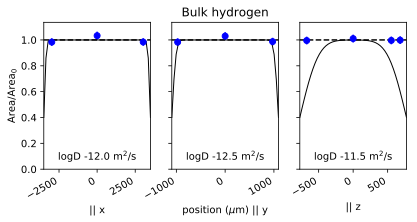

In [24]:
fig, list_of_axes = my_first_block.plot_diffusion(time_seconds=2*3600., labelDy=0.1, 
                                                  wholeblock_data=True, init=1., fin=0.4,
                                                  wholeblock_diffusion=False, 
                                                  log10D_m2s=[-12., -12.5, -11.5])